In [1]:
# Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from Library.sb_utils import save_file

In [2]:
pd.options.display.max_columns = 1000

In [3]:
# Import learning modules
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
# Read file
df = pd.read_csv('Data/Written_essay_scores_cleaned_melted.csv')

In [5]:
df.head()

,Code,Content (/12),Organization (/12),Vocabulary (/12),Language Use (/12),Mechanics (/12),Total 1 (%),Total 2 (Weighted %),PTJ1 (wds),SMK1 (wds),Sex,Age,Grade/Degree,VST,INTM,INSM,INTM+INSM,INTM-INSM,Primary,Secondary,College,Inschool,Outschool,Listening,Reading,Speaking,Writing,NS,Pronunciation,Presentation,EssayW,CEE,TOEIC,ONET,CEE_isna,ONET_isna,TOEIC_isna,CHN,HKG,IDN,JPN,KOR,PAK,PHL,SIN,THA,TWN,Humanities,Life Sciences,Other Fields,Sciences & Technology,Social Sciences,A2_0,B1_1,B1_2,B2_0
0,W_CHN_001,9.5,8.0,8.0,6.5,8.0,66.65,64.55,271,219,0,20,2.0,30.0,0.00,0.00,0.00,0.00,2.0,3.63,4.25,3.89,3.56,4.00,4.50,3.50,3.75,4.0,5.0,5.0,4.0,72.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,W_CHN_002,9.0,8.5,9.0,8.0,9.0,72.50,68.75,203,292,0,21,3.0,27.0,4.17,4.33,8.50,-0.16,2.5,4.00,1.86,3.00,2.88,3.00,3.00,2.75,3.33,3.0,3.0,3.0,3.0,77.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,W_CHN_003,9.0,8.5,8.0,8.5,8.0,70.00,67.55,238,250,0,20,3.0,32.0,5.17,5.17,10.34,0.00,3.5,4.25,4.25,4.22,4.11,5.00,4.00,3.75,4.25,4.0,5.0,5.0,5.0,79.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,W_CHN_004,8.5,9.0,7.5,8.5,9.5,71.70,66.90,269,230,0,20,2.0,37.0,4.67,5.17,9.84,-0.50,1.0,2.75,4.25,3.44,3.00,3.75,3.75,3.25,3.25,3.0,5.0,5.0,5.0,87.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,W_CHN_005,9.5,8.5,9.5,10.0,8.5,76.65,73.95,225,208,1,20,2.0,44.0,5.17,5.33,10.50,-0.16,2.0,3.63,4.88,4.33,3.67,5.00,5.00,3.25,3.75,3.0,5.0,5.0,5.0,84.0,0.0,0.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)',
       'Total 2 (Weighted %)', 'PTJ1 (wds)', 'SMK1 (wds)', 'Sex', 'Age',
       'Grade/Degree', 'VST', 'INTM', 'INSM', 'INTM+INSM', 'INTM-INSM',
       'Primary', 'Secondary', 'College', 'Inschool', 'Outschool', 'Listening',
       'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation',
       'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna',
       'CHN', 'HKG', 'IDN', 'JPN', 'KOR', 'PAK', 'PHL', 'SIN', 'THA', 'TWN',
       'Humanities', 'Life Sciences', 'Other Fields', 'Sciences & Technology',
       'Social Sciences', 'A2_0', 'B1_1', 'B1_2', 'B2_0'],
      dtype='object')

In [7]:
# Motivations scores highly correlated and redundant. Keep just one. Weighted total is a competing target variable. Drop that one too
df = df.drop(['INTM', 'INSM', 'INTM-INSM', 'Total 2 (Weighted %)'], axis=1)

In [8]:
df.dtypes

Code                      object
Content (/12)            float64
Organization (/12)       float64
Vocabulary (/12)         float64
Language Use (/12)       float64
Mechanics (/12)          float64
Total 1 (%)              float64
PTJ1 (wds)                 int64
SMK1 (wds)                 int64
Sex                        int64
Age                        int64
Grade/Degree             float64
VST                      float64
INTM+INSM                float64
Primary                  float64
Secondary                float64
College                  float64
Inschool                 float64
Outschool                float64
Listening                float64
Reading                  float64
Speaking                 float64
Writing                  float64
NS                       float64
Pronunciation            float64
Presentation             float64
EssayW                   float64
CEE                      float64
TOEIC                    float64
ONET                     float64
CEE_isna  

In [9]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)', 'PTJ1 (wds)',
       'SMK1 (wds)', 'Sex', 'Age', 'Grade/Degree', 'VST', 'INTM+INSM',
       'Primary', 'Secondary', 'College', 'Inschool', 'Outschool', 'Listening',
       'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation',
       'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna',
       'CHN', 'HKG', 'IDN', 'JPN', 'KOR', 'PAK', 'PHL', 'SIN', 'THA', 'TWN',
       'Humanities', 'Life Sciences', 'Other Fields', 'Sciences & Technology',
       'Social Sciences', 'A2_0', 'B1_1', 'B1_2', 'B2_0'],
      dtype='object')

In [10]:
# Subset X and y
not_X_cols = ['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)']
X = df.drop(not_X_cols, axis=1)
y = df.loc[:, 'Total 1 (%)'].values
X.dtypes

PTJ1 (wds)                 int64
SMK1 (wds)                 int64
Sex                        int64
Age                        int64
Grade/Degree             float64
VST                      float64
INTM+INSM                float64
Primary                  float64
Secondary                float64
College                  float64
Inschool                 float64
Outschool                float64
Listening                float64
Reading                  float64
Speaking                 float64
Writing                  float64
NS                       float64
Pronunciation            float64
Presentation             float64
EssayW                   float64
CEE                      float64
TOEIC                    float64
ONET                     float64
CEE_isna                   int64
ONET_isna                  int64
TOEIC_isna                 int64
CHN                      float64
HKG                      float64
IDN                      float64
JPN                      float64
KOR       

In [11]:
# For EDA - scatter plots of each independent variable to dependent variable
def scatterplots(columns, y_col, data, ncol=None, figsize=(15,8)) :
    if ncol == None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = y_col, data = data, alpha=0.5)
        ax.set(xlabel=col, ylabel=y_col)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

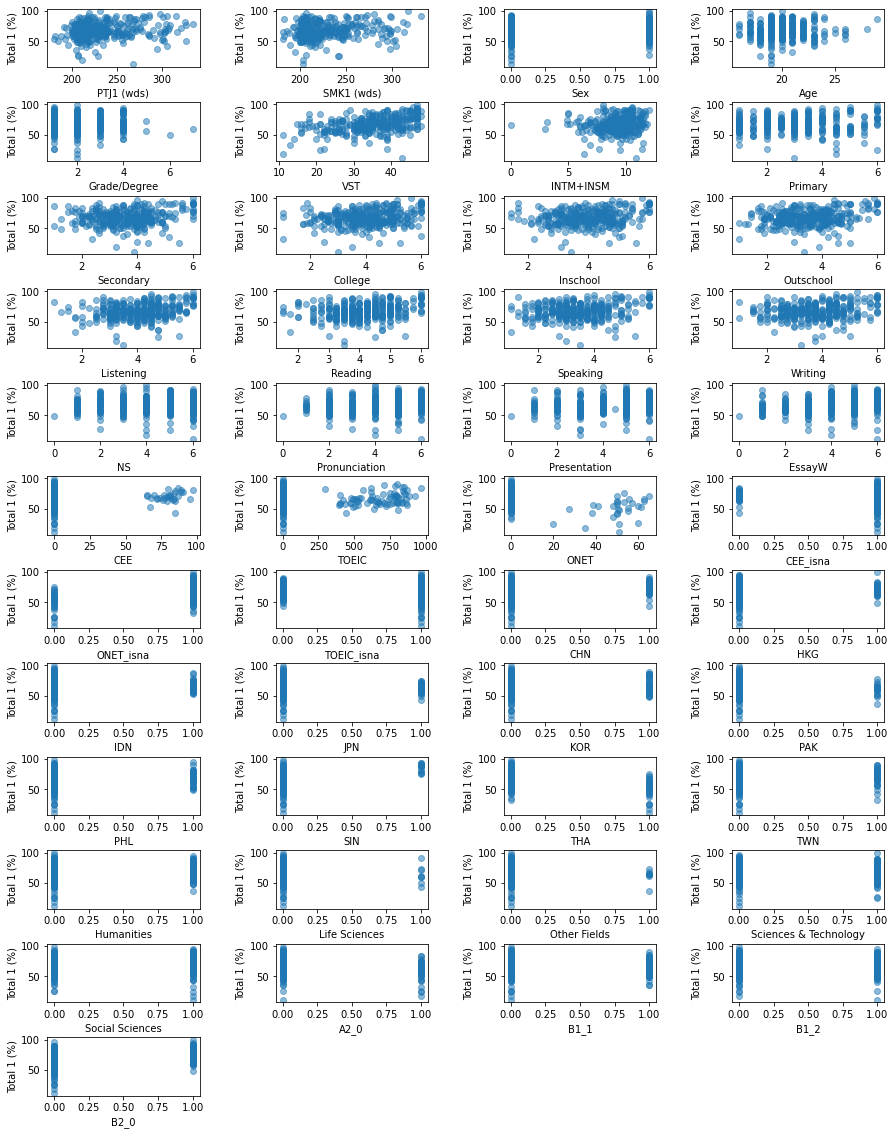

In [12]:
# EDA - plotted
scatterplots(columns = X.columns, y_col = 'Total 1 (%)', data = df, ncol=4, figsize=(15,20))

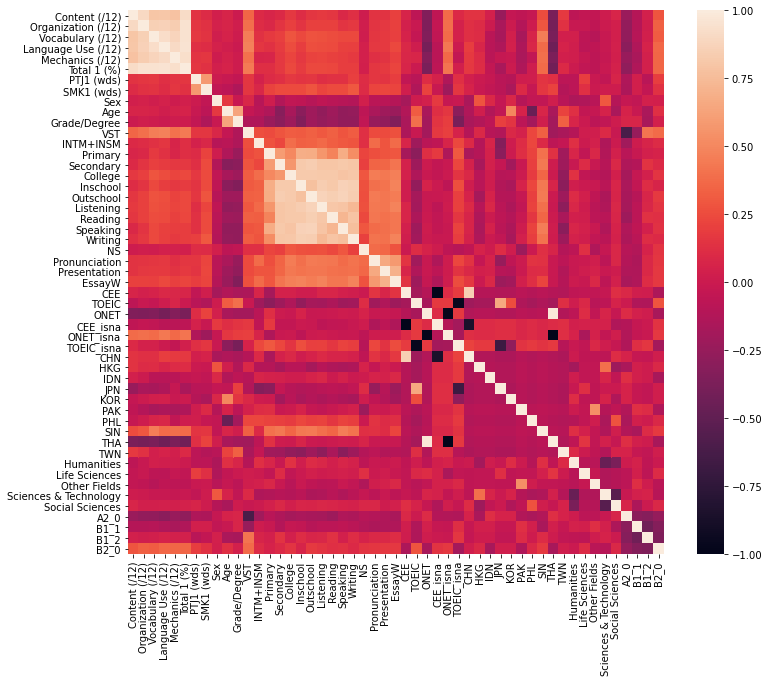

In [13]:
# Also EDA - heatmap
_ = plt.subplots(figsize=(12,10))
_ = sns.heatmap(df.corr())

In [14]:
test = X.ONET_isna != X.THA
test.sum()/len(test)

1.0

In [15]:
# ONET_isna and THA are complementary. Drop one.
X = X.drop(['ONET_isna'], axis=1)

In [16]:
test = X.CEE_isna != X.CHN
test.sum()/len(test)

0.9688473520249221

In [17]:
# Judgment call, but CEE_isna and CHN are 97% complementary. Drop one.
X = X.drop(['CEE_isna'], axis=1)

In [18]:
test = X.TOEIC_isna != X.JPN
test.sum()/len(test)

0.8878504672897196

In [19]:
# 89% Complementary. Might as well drop all the isna's.
X = X.drop(['TOEIC_isna'], axis=1)

In [20]:
# Other Fields is complementary to the sum of the other fields. This should have actually been deleted during one hot encoding. Drop now.
X = X.drop(['Other Fields'], axis=1)

In [21]:
# Drop one country (should have been deleted during one hot encoding). PAK seems most central according to EDA.
X = X.drop(['PAK'], axis=1)

In [22]:
X.columns

Index(['PTJ1 (wds)', 'SMK1 (wds)', 'Sex', 'Age', 'Grade/Degree', 'VST',
       'INTM+INSM', 'Primary', 'Secondary', 'College', 'Inschool', 'Outschool',
       'Listening', 'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation',
       'Presentation', 'EssayW', 'CEE', 'TOEIC', 'ONET', 'CHN', 'HKG', 'IDN',
       'JPN', 'KOR', 'PHL', 'SIN', 'THA', 'TWN', 'Humanities', 'Life Sciences',
       'Sciences & Technology', 'Social Sciences', 'A2_0', 'B1_1', 'B1_2',
       'B2_0'],
      dtype='object')

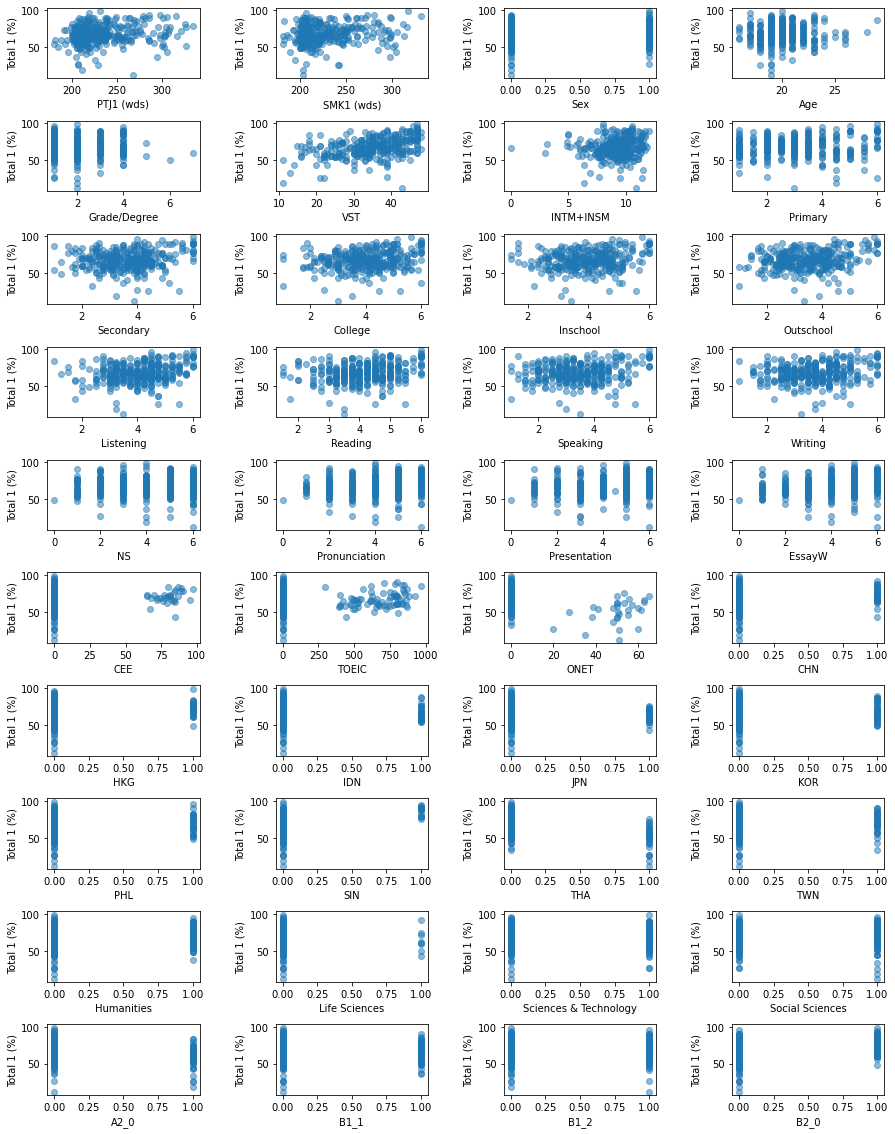

In [23]:
# EDA - plotted
scatterplots(columns = X.columns, y_col = 'Total 1 (%)', data = df, ncol=4, figsize=(15,20))

In [24]:
sub = [col for col in X.columns]
sub.append('Total 1 (%)')
df_sub = df[sub]
df_sub.head()

,PTJ1 (wds),SMK1 (wds),Sex,Age,Grade/Degree,VST,INTM+INSM,Primary,Secondary,College,Inschool,Outschool,Listening,Reading,Speaking,Writing,NS,Pronunciation,Presentation,EssayW,CEE,TOEIC,ONET,CHN,HKG,IDN,JPN,KOR,PHL,SIN,THA,TWN,Humanities,Life Sciences,Sciences & Technology,Social Sciences,A2_0,B1_1,B1_2,B2_0,Total 1 (%)
0,271,219,0,20,2.0,30.0,0.00,2.0,3.63,4.25,3.89,3.56,4.00,4.50,3.50,3.75,4.0,5.0,5.0,4.0,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,66.65
1,203,292,0,21,3.0,27.0,8.50,2.5,4.00,1.86,3.00,2.88,3.00,3.00,2.75,3.33,3.0,3.0,3.0,3.0,77.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,72.50
2,238,250,0,20,3.0,32.0,10.34,3.5,4.25,4.25,4.22,4.11,5.00,4.00,3.75,4.25,4.0,5.0,5.0,5.0,79.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,70.00
3,269,230,0,20,2.0,37.0,9.84,1.0,2.75,4.25,3.44,3.00,3.75,3.75,3.25,3.25,3.0,5.0,5.0,5.0,87.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,71.70
4,225,208,1,20,2.0,44.0,10.50,2.0,3.63,4.88,4.33,3.67,5.00,5.00,3.25,3.75,3.0,5.0,5.0,5.0,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,76.65


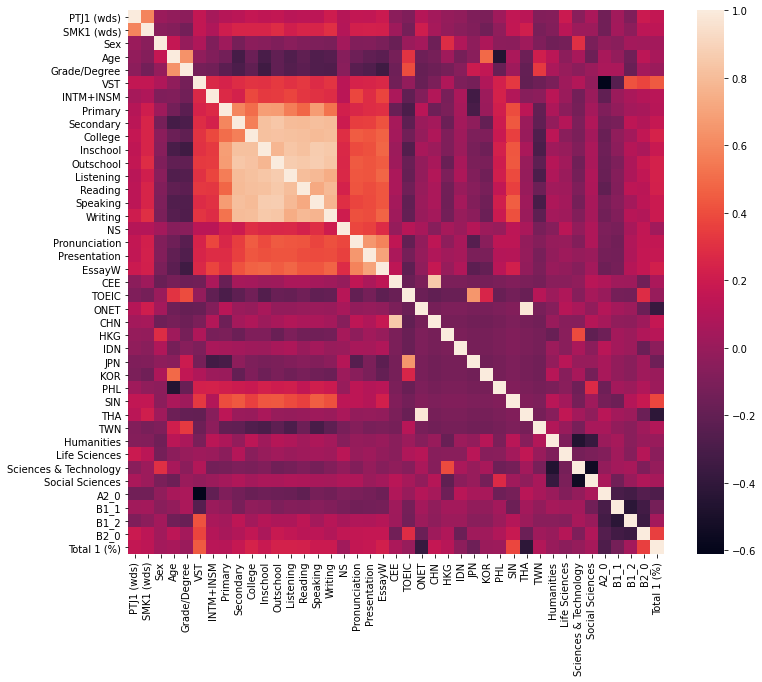

In [25]:
# Also EDA - heatmap
_ = plt.subplots(figsize=(12,10))
_ = sns.heatmap(df_sub.corr())

In [26]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X = sm.add_constant(X)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train), type(X_test), type(y_train), type(y_test))

(240, 40) (81, 40) (240,) (81,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
# First model - multivariate linear regression
OLSmodel = sm.OLS(y_train, X_train)
lr_all = OLSmodel.fit()
lr_all.params

PTJ1 (wds)                 0.013788
SMK1 (wds)                 0.024982
Sex                        2.208340
Age                       -0.571125
Grade/Degree               0.323707
VST                        0.492900
INTM+INSM                  0.170981
Primary                  -47.221717
Secondary               -100.566672
College                  -99.414625
Inschool                 213.044481
Outschool                212.878076
Listening                -44.458431
Reading                  -44.802957
Speaking                 -44.703371
Writing                  -44.514051
NS                        -0.381425
Pronunciation             -0.139477
Presentation              -0.027139
EssayW                     0.728837
CEE                       -0.058210
TOEIC                      0.002961
ONET                       0.724802
CHN                       17.084712
HKG                       10.772652
IDN                        6.866328
JPN                        1.808541
KOR                        6

In [29]:
lr_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     6.435
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           2.21e-19
Time:                        07:20:52   Log-Likelihood:                -874.12
No. Observations:                 240   AIC:                             1828.
Df Residuals:                     200   BIC:                             1967.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PTJ1 (wds)                0.0138      0.028      0.490      0.625      -0.042       0.069
SMK1 (wds)                0.0250      0.029      0.858      0.392      -0.032       0.082
Sex                       2.2083      1.670      1.322      0.188      -1.085       5.502
Age                      -0.5711      0.644     -0.887      0.376      -1.840       0.698
Grade/Degree              0.3237      0.977      0.331      0.741      -1.602       2.250
VST                       0.4929      0.147      3.347      0.001       0.203       0.783
INTM+INSM                 0.1710      0.533      0.321      0.749      -0.881       1.223
Primary                 -47.2217     38.629     -1.222      0.223    -123.394      28.951
Secondary              -100.5667     69.512     -1.447      0.150    -237.638      36.504
College                 -99.4146     69.426     -1.432      0.154    -236.316      37.487
Inschool                213.0445    173.888      1.225      0.222    -129.845     555.934
Outschool               212.8781    173.866      1.224      0.222    -129.968     555.724
Listening               -44.4584     64.991     -0.684      0.495    -172.615      83.698
Reading                 -44.8030     65.070     -0.689      0.492    -173.115      83.509
Speaking                -44.7034     64.931     -0.688      0.492    -172.740      83.333
Writing                 -44.5141     64.667     -0.688      0.492    -172.030      83.002
NS                       -0.3814      0.518     -0.737      0.462      -1.402       0.639
Pronunciation            -0.1395      0.730     -0.191      0.849      -1.579       1.300
Presentation             -0.0271      0.769     -0.035      0.972      -1.543       1.489
EssayW                    0.7288      0.737      0.988      0.324      -0.725       2.183
CEE                      -0.0582      0.060     -0.966      0.335      -0.177       0.061
TOEIC                     0.0030      0.004      0.683      0.495      -0.006       0.012
ONET                      0.7248      0.209      3.462      0.001       0.312       1.138
CHN                      17.0847      5.341      3.199      0.002       6.553      27.617
HKG                      10.7727      4.454      2.419      0.016       1.990      19.556
IDN                       6.8663      4.329      1.586      0.114      -1.669      15.402
JPN                       1.8085      5.423      0.333      0.739      -8.885      12.502
KOR                       6.9911      4.208      1.661      0.098      -1.307      15.289
PHL                       3.5591      4.576      0.778      0.438      -5.464      12.583
SIN                      19.9166      4.556      4.372      0.000      10.933      28.900
THA                     -46.4766     11.290     -4.117      0.000     -68.740     -24.214
TWN                    

In [30]:
# Training prediction for OLS multi-linreg
y_tr_pred = lr_all.predict(X_train)
y_tr_pred

168    68.737848
148    63.339568
221    71.863344
227    73.130330
139    60.196638
         ...    
188    59.987989
71     67.904316
106    60.391422
270    60.895432
102    62.041714
Length: 240, dtype: float64

In [31]:
# Test prediction for OLS multi-linreg
y_te_pred = lr_all.predict(X_test)
y_te_pred

173    65.388466
132    57.381245
197    60.877157
9      72.382671
104    63.130496
         ...    
218    72.217406
318    71.497348
244    89.182826
31     78.684888
267    43.616153
Length: 81, dtype: float64

In [32]:
# For plotting performance of model versus actual
def pred_plot(y_pred, y_true, figsize=(8,6)):
    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))

    ax.scatter(y_pred, y_true, color='b', label='predicted')
    ax.plot(y_true, y_true, marker='.', linestyle='-', color='r', label='perfect "model"')

    ax.set_xlabel('predicted')
    ax.set_ylabel('actual')
    ax.legend()

    plt.show()

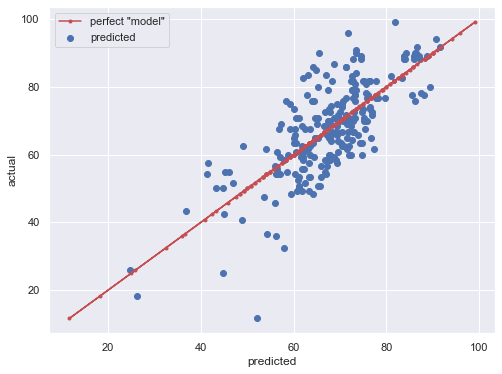

In [33]:
# Training set performance
pred_plot(y_tr_pred, y_train)

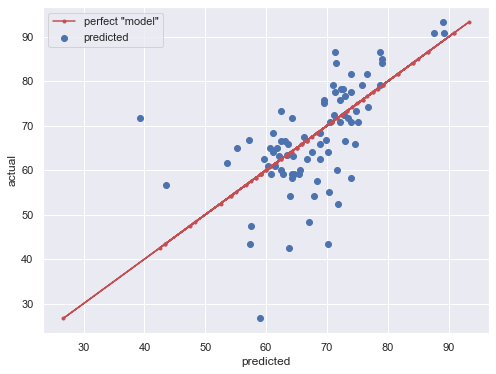

In [34]:
# Test set performance
pred_plot(y_te_pred, y_test)

In [35]:
# R^2 scores
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5564948720901985, 0.34308962366640927)

In [36]:
# Pipeline for linear regression, for selecting best number of features to feed into linreg
pipe = make_pipeline(SelectKBest(f_regression), LinearRegression())

In [37]:
# For displaying CV result statistics
def cv_score_summary(cv_results):
    cv_scores = cv_results['test_score']
    print("CV scores are: ", cv_scores)
    print("Mean and std CV scores: ", np.mean(cv_scores), np.std(cv_scores))
    print("95% confidence interval for CV scores: ", 
          np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2))

In [38]:
# 5-fold CV, cross-validation scores
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [39]:
cv_score_summary(cv_results)

CV scores are:  [0.04196036 0.3150181  0.59361098 0.41869458 0.36852735]
Mean and std CV scores:  0.34756227495123965 0.17915968071871427
95% confidence interval for CV scores:  [-0.01  0.71]


In [40]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [41]:
# Set up parameters for linreg
grid_params = {'selectkbest__k': [k+1 for k in range(len(X_train.columns))]}

In [42]:
# 5-fold CV Grid Search re: number of independent variables
lr_grid_cv = GridSearchCV(pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [43]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x0000028065EA3430>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [44]:
# Grid Search summary stats
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [45]:
# Best number of k's
lr_grid_cv.best_params_

{'selectkbest__k': 4}

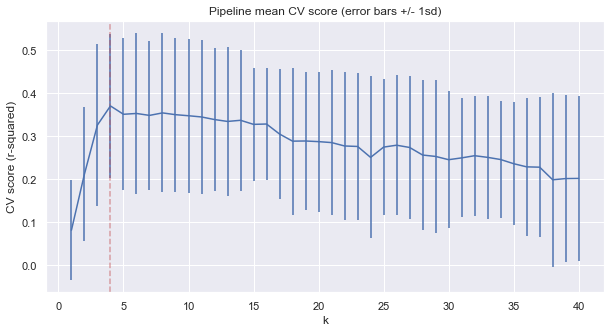

In [46]:
# Visually plotting best number of k's
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [47]:
# Optimal columns for best linreg fit: selected
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
X_train.columns[selected]

Index(['VST', 'ONET', 'SIN', 'THA'], dtype='object')

In [48]:
# Coefficients of regression: coefs; column names: features
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

SIN     13.071659
ONET     0.681047
VST      0.477927
THA    -51.235460
dtype: float64

In [49]:
# Subset training and testing sets for columns of interest
X_train_lr = X_train[features]
X_test_lr = X_test[features]

In [50]:
lr_grid_cv.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('selectkbest',
                 SelectKBest(k=4,
                             score_func=<function f_regression at 0x0000028065EA3430>)),
                ('linearregression', LinearRegression())])

In [53]:
y_tr_lr_pred = lr_grid_cv.best_estimator_.predict(X_train)

In [54]:
y_te_lr_pred = lr_grid_cv.best_estimator_.predict(X_test)

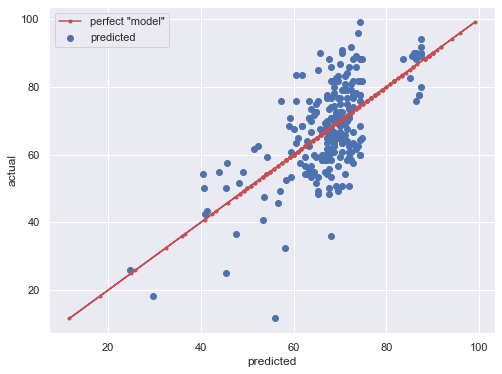

In [55]:
# Training set performance
pred_plot(y_tr_lr_pred, y_train)

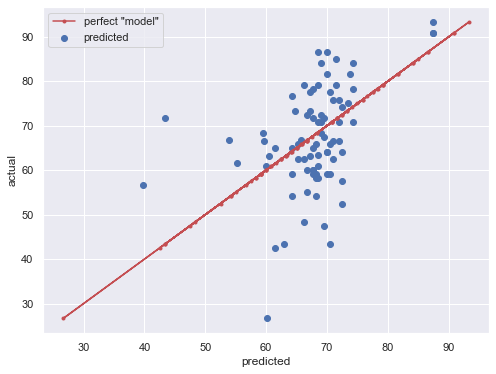

In [56]:
# Testing set performance
pred_plot(y_te_lr_pred, y_test)

In [57]:
r2_score(y_train, y_tr_lr_pred), r2_score(y_test, y_te_lr_pred)

(0.43418027885175337, 0.1600451801413979)

In [128]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

In [104]:
# Define grid number of estimators: grid_params
grid_params = { 'randomforestregressor__n_estimators': [int(n) for n in np.logspace(start=1, stop=3, num=20)],
                'randomforestregressor__max_features': [k+1 for k in range(len(X_train.columns))],  
                'standardscaler': [StandardScaler(), None] }
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'randomforestregressor__max_features': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 'standardscaler': [StandardScaler(), None]}

In [105]:
# 5-fold CV Grid Search with # of estimators
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [106]:
# Fit with training set
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9, 10,
                                                                 11, 12, 13, 14,
                                                                 15, 16, 17, 18,
                                                                 19, 20, 21, 22,
                                                                 23, 24, 25, 26,
                                                                 27, 28, 29, 30, ...],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
             

In [129]:
# Best number of estimators
rf_grid_cv.best_params_

{'randomforestregressor__max_features': 6,
 'randomforestregressor__n_estimators': 42,
 'standardscaler': StandardScaler()}

In [130]:
# 5-fold CV with optimal number of estimators in Random Forest
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)

In [131]:
rf_best_cv_results

{'fit_time': array([0.0508585 , 0.04189062, 0.03789854, 0.03989482, 0.0428772 ]),
 'score_time': array([0.00398898, 0.00299191, 0.00398827, 0.00299191, 0.00496626]),
 'test_score': array([-3.58349227e-04,  2.47734158e-01,  4.63714867e-01,  3.26091968e-01,
         4.37894848e-01])}

In [132]:
# Summary statistics for RF model
cv_score_summary(rf_best_cv_results)

CV scores are:  [-3.58349227e-04  2.47734158e-01  4.63714867e-01  3.26091968e-01
  4.37894848e-01]
Mean and std CV scores:  0.29501549841489866 0.16692571254721297
95% confidence interval for CV scores:  [-0.04  0.63]


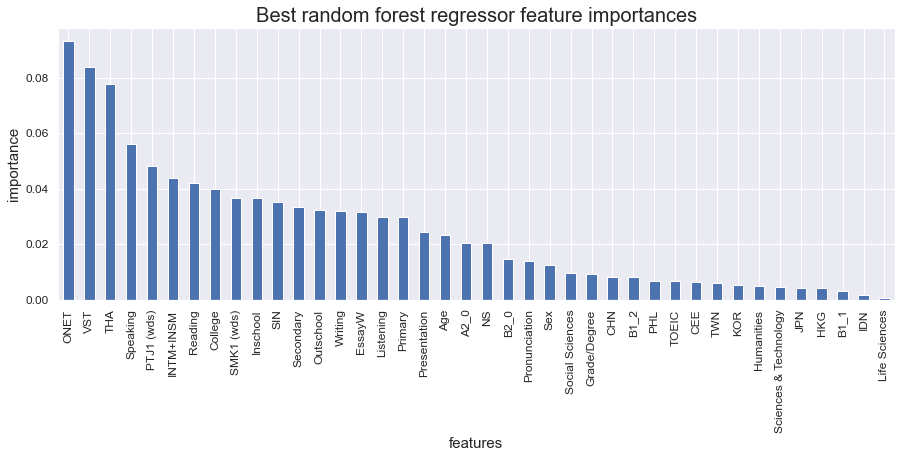

In [133]:
# Plot importance of features
plt.subplots(figsize=(15, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar', fontsize=12)
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.title('Best random forest regressor feature importances', fontsize=20);

In [134]:
# Predictions for training and test sets
y_tr_rf_pred = rf_grid_cv.best_estimator_.predict(X_train)
y_te_rf_pred = rf_grid_cv.best_estimator_.predict(X_test)

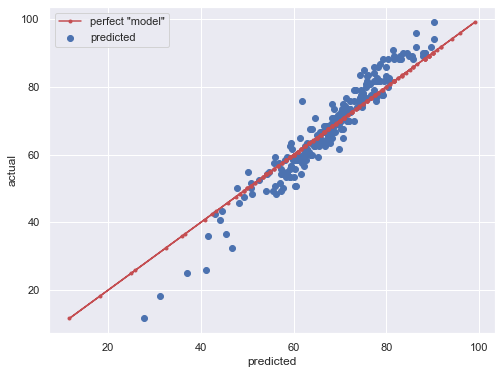

In [135]:
# Plot Training set results. Very nicely fitted - much better than linreg.
pred_plot(y_tr_rf_pred, y_train)

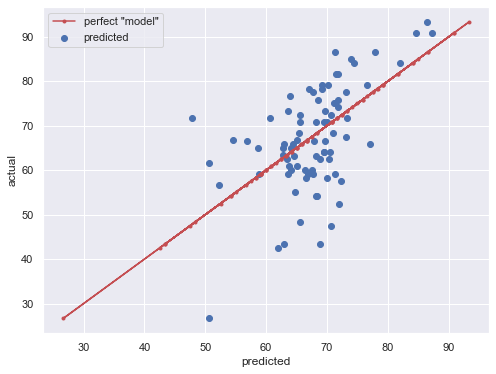

In [136]:
# Plot testing set results. Much worse performance in the testing set, not much better than linreg. 
# Very overfitted. May just need more data, or more optimization of (or fewer) parameters.
pred_plot(y_te_rf_pred, y_test)

In [137]:
r2_score(y_train, y_tr_rf_pred), r2_score(y_test, y_te_rf_pred)

(0.8975549761076803, 0.30104976022708874)

In [138]:
print("Random Forest Model: ")
print("R^2: ", r2_score(y_test, y_te_rf_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_rf_pred)) ** 0.5)

Random Forest Model: 
R^2:  0.30104976022708874
RMSE:  9.876454417039135


In [58]:
print("Linear Regression Model (k-regression): ")
print("R^2: ", r2_score(y_test, y_te_lr_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_lr_pred)) ** 0.5)

Linear Regression Model (k-regression): 
R^2:  0.1600451801413979
RMSE:  10.826944182881995


In [140]:
print("Linear Regression Model (all variables): ")
print("R^2: ", r2_score(y_test, y_te_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_pred)) ** 0.5)

Linear Regression Model (all variables): 
R^2:  0.34308962366640927
RMSE:  9.574828316747592
